In [1]:
import numpy as np
from utils.utils import Function, UzawaSolver, UzawaPlotter

## Une fonction Simple bien conditionnee:

$$f(x, y) = x^2 + y ^ 2$$

on optimize la fonction sou la contrainte:

$$K = \{(x, y) \in \mathbb{R}^2\ |\ g(x, y) = -x-y+1 \leq 0 \}$$

L'optimum theorique est donne par:

$$X^{*} = (\frac{1}{2}, \frac{1}{2})$$

In [2]:

# define the first function
function_1 = Function(
    lambda x: x[0] ** 2 + x[1] ** 2,
    lambda x: np.array([2 * x[0], 2 * x[1]]),
    lambda x: np.array([[2, 0], [0, 2]])
)

In [3]:
constraint_1 = Function(
    lambda x: -x[0] - x[1] + 1,
    lambda x: np.array([-1, -1]),
    lambda x: np.array([[0, 0], [0, 0]])
)

In [4]:
    # def solve_min(self, x0_internal, _lambda: np.array, tau=0.01, alpha=0.01, 
    #               max_iter=50, use_epsilon=False, epsilon=0.01, decay_type=None, decay_param=None):
        
solver = UzawaSolver(function_1, [constraint_1])

solver.solve_min(x0_internal=np.array([-2, -2]), _lambda=np.array([5]), tau=0.1, max_iter=100, max_iter_internal=500)
solver.iters

100

--------------------------------------------------------------------------------------

            
            Calculated Optiaml x: [0.50005905 0.50005905]
            iteration to convergence: 100


--------------------------------------------------------------------------------------


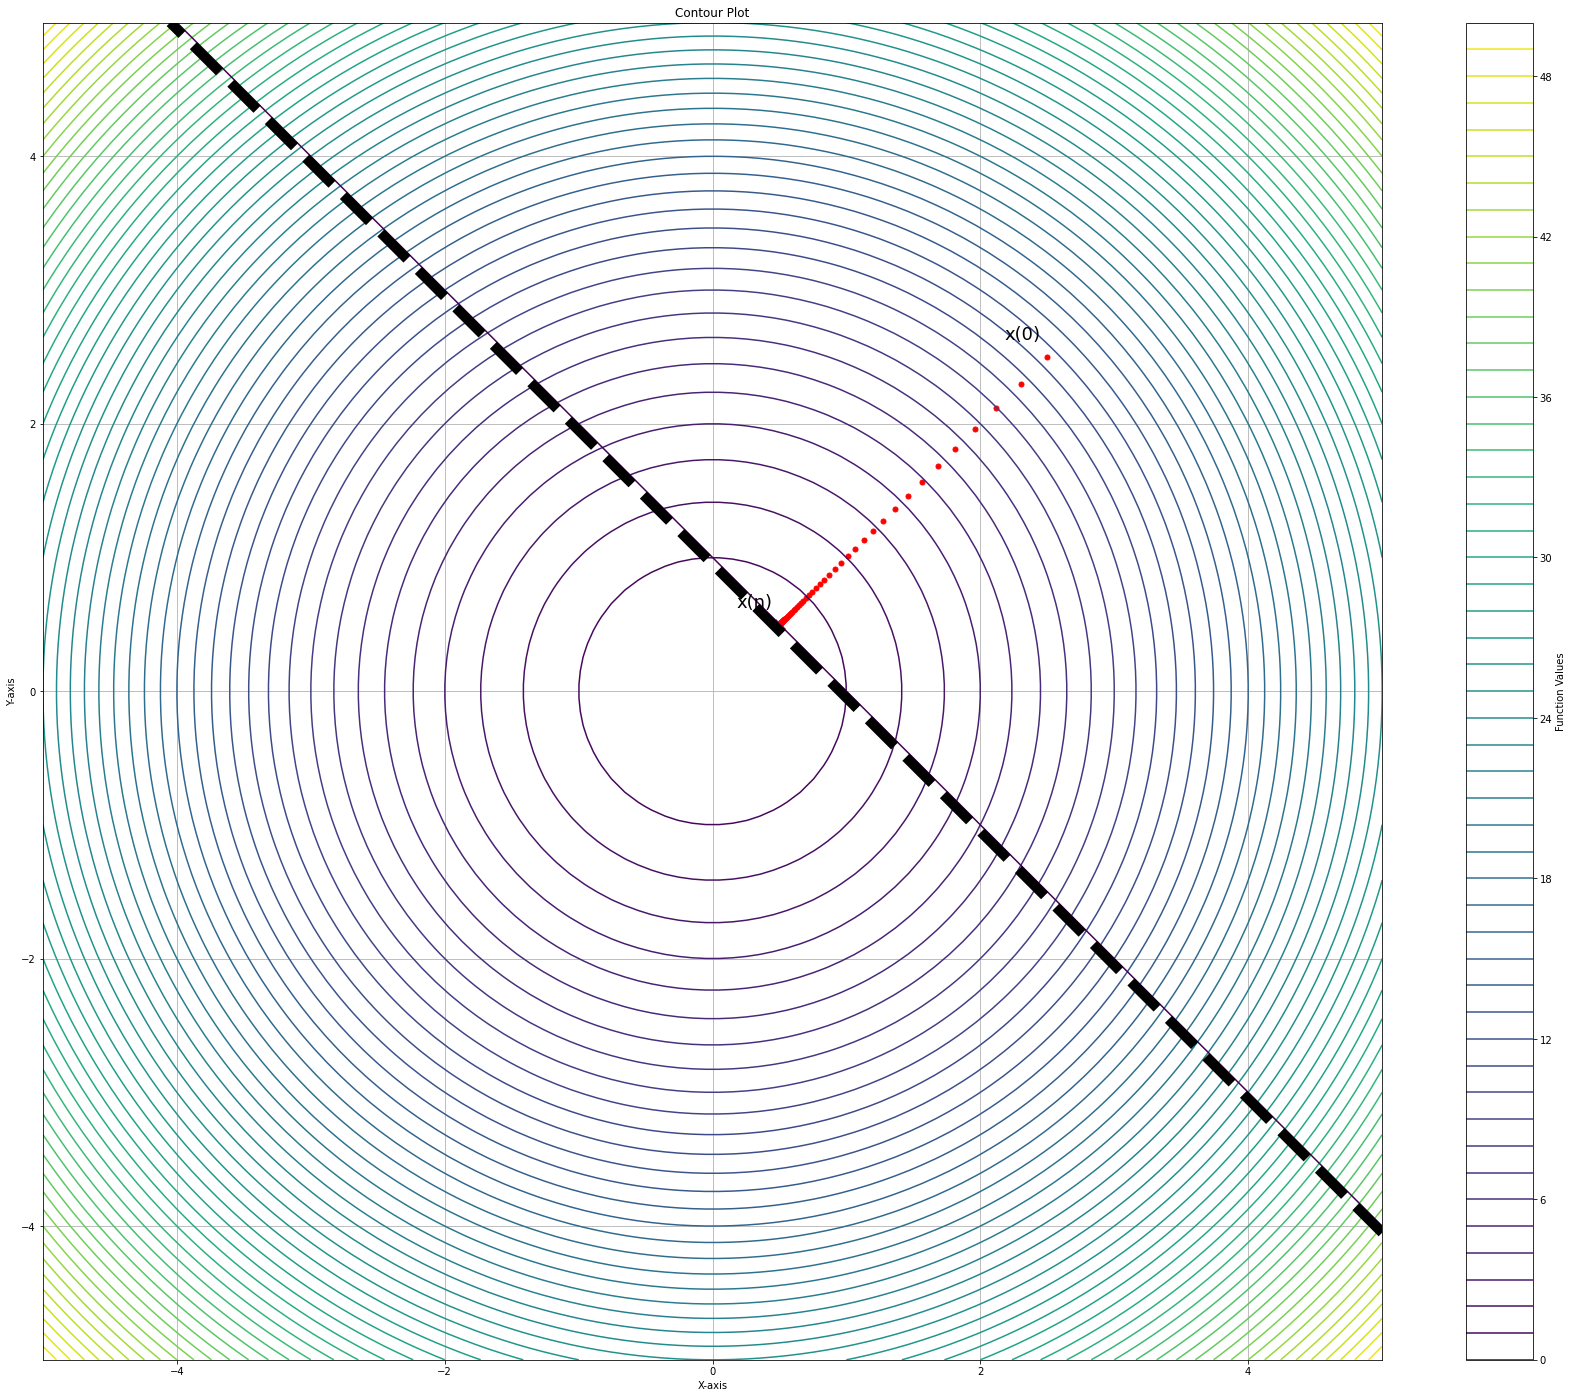

In [5]:
from utils.utils import UzawaPlotter

plotter = UzawaPlotter(solver=solver)
plotter.summary()

----------------------

## Une fonction mal conditionnée:

$$f(x, y) = \frac{1}{2} x^2 + 100 y ^ 2$$

on optimize la fonction sou la contrainte:

$$K = \{(x, y) \in \mathbb{R}^2\ |\ g_{1}(x, y) = -x-y+1 \leq 0 \ \text{et} \ g_{2}(x, y) = x^2 - y \leq 0 \ \}$$

L'optimum theorique est donne par:

$$X^{*} = (\frac{-1+\sqrt{5}}{2}, \frac{3-\sqrt{5}}{2}) \approx (0.61, 0.38)$$

In [6]:
# the second function,

function_2 = Function(
    lambda x: 0.5 * x[0] ** 2 + 100 * x[1] ** 2,
    lambda x: np.array([x[0], 200 * x[1]]),
    lambda x: np.array([[1, 0], [0, 200]])
) 

In [7]:
# the first constrain
constraint_21 = Function(
    lambda x: -x[0] - x[1] + 1,
    lambda x: np.array([-1, -1]),
    lambda x: np.array([[0, 0], [0, 0]])
)

# the second constraint
constraint_22 = Function(
    lambda x: x[0] ** 2 - x[1],
    lambda x: np.array([2 * x[0], -1]),
    lambda x: np.array([[2, 0], [0, 0]])
)

--------------------------------------------------------------------------------------

            
            Calculated Optiaml x: [0.61769731 0.37933099]
            iteration to convergence: 500


--------------------------------------------------------------------------------------


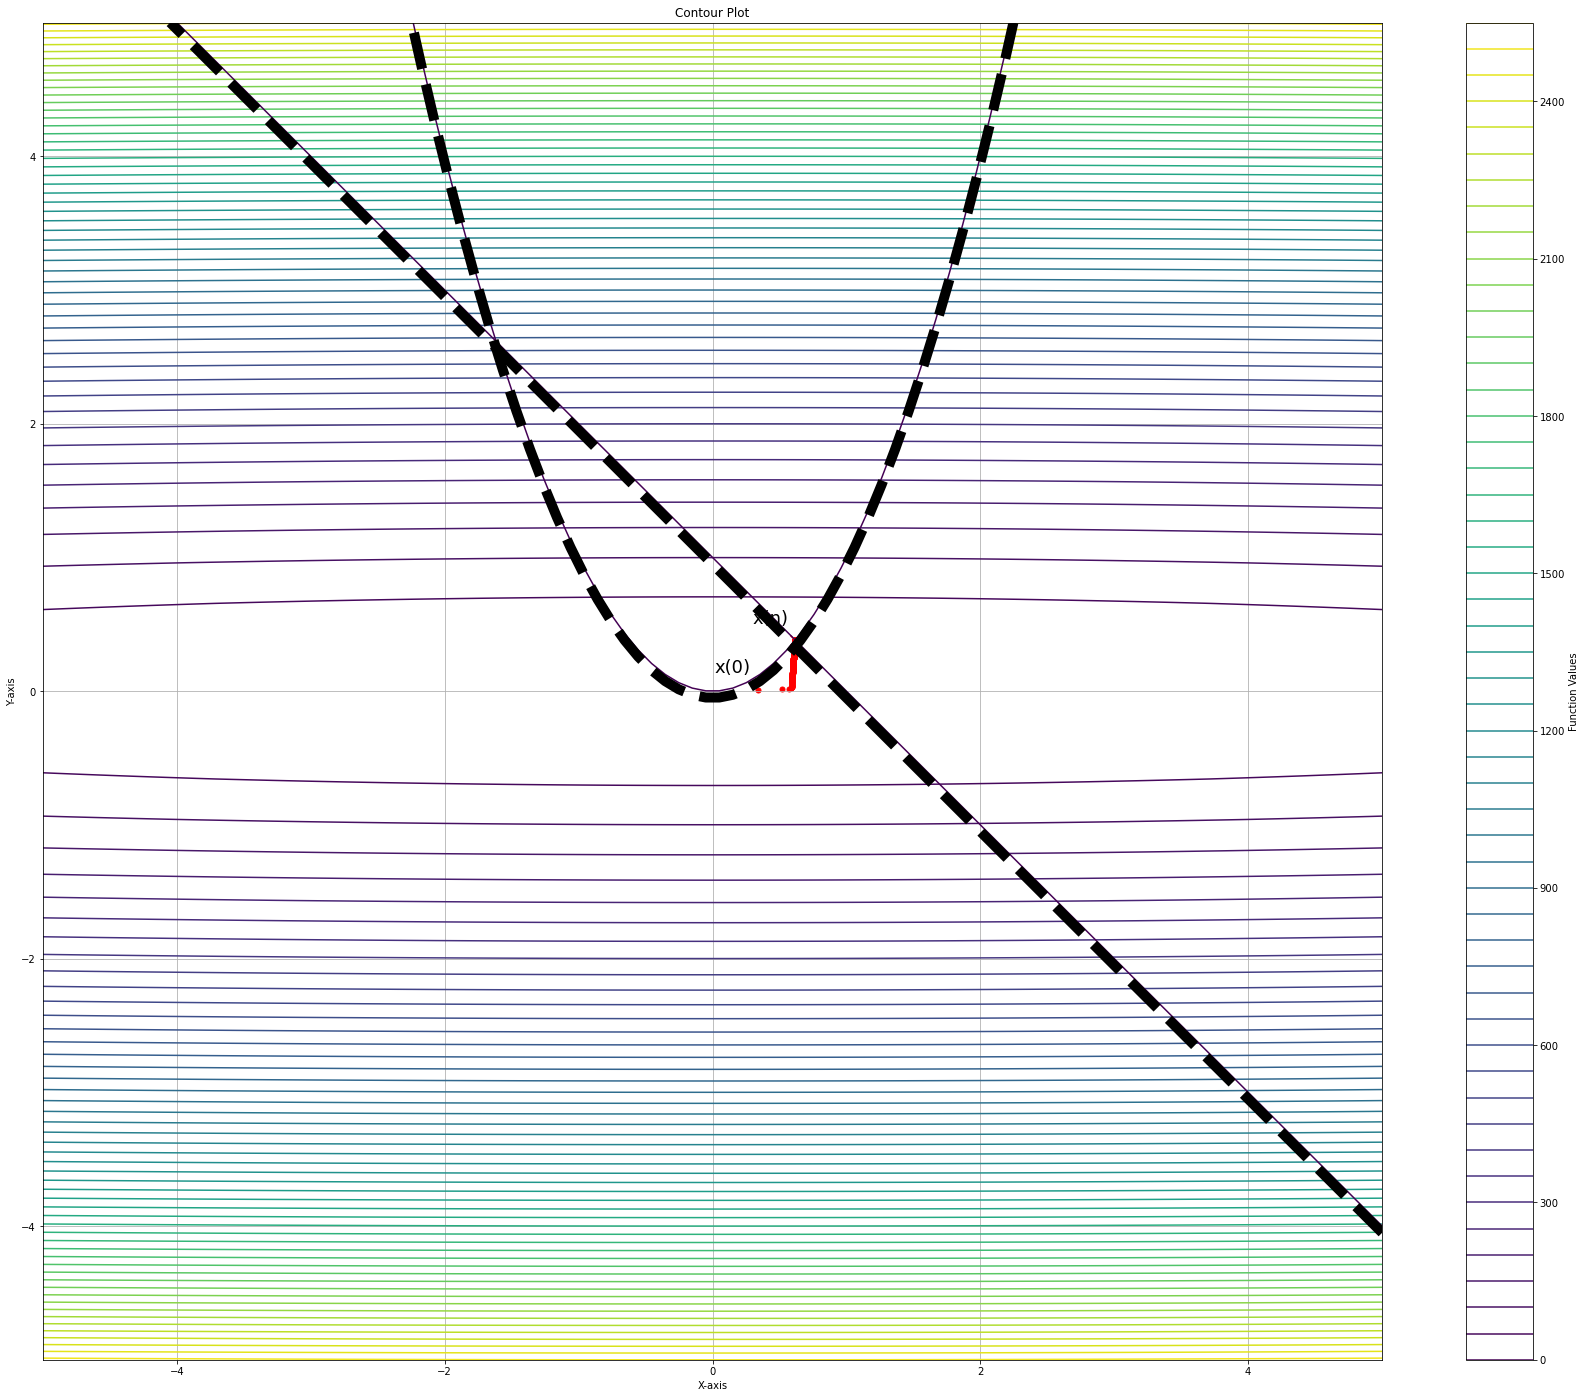

In [19]:
second_solver = UzawaSolver(function_2, [constraint_21, constraint_22])
second_solver.solve_min(
    x0_internal=np.array([4, 4]), _lambda=np.array([1, 1]), tau=1, max_iter=500, 
    alpha=0.005, use_epsilon_internal=True, max_iter_internal=1000
)
plotter2 = UzawaPlotter(second_solver)
plotter2.summary()

--------------------------------------------------------------------------------------

            
            Calculated Optiaml x: [0.61796989 0.38146687]
            iteration to convergence: 668


--------------------------------------------------------------------------------------


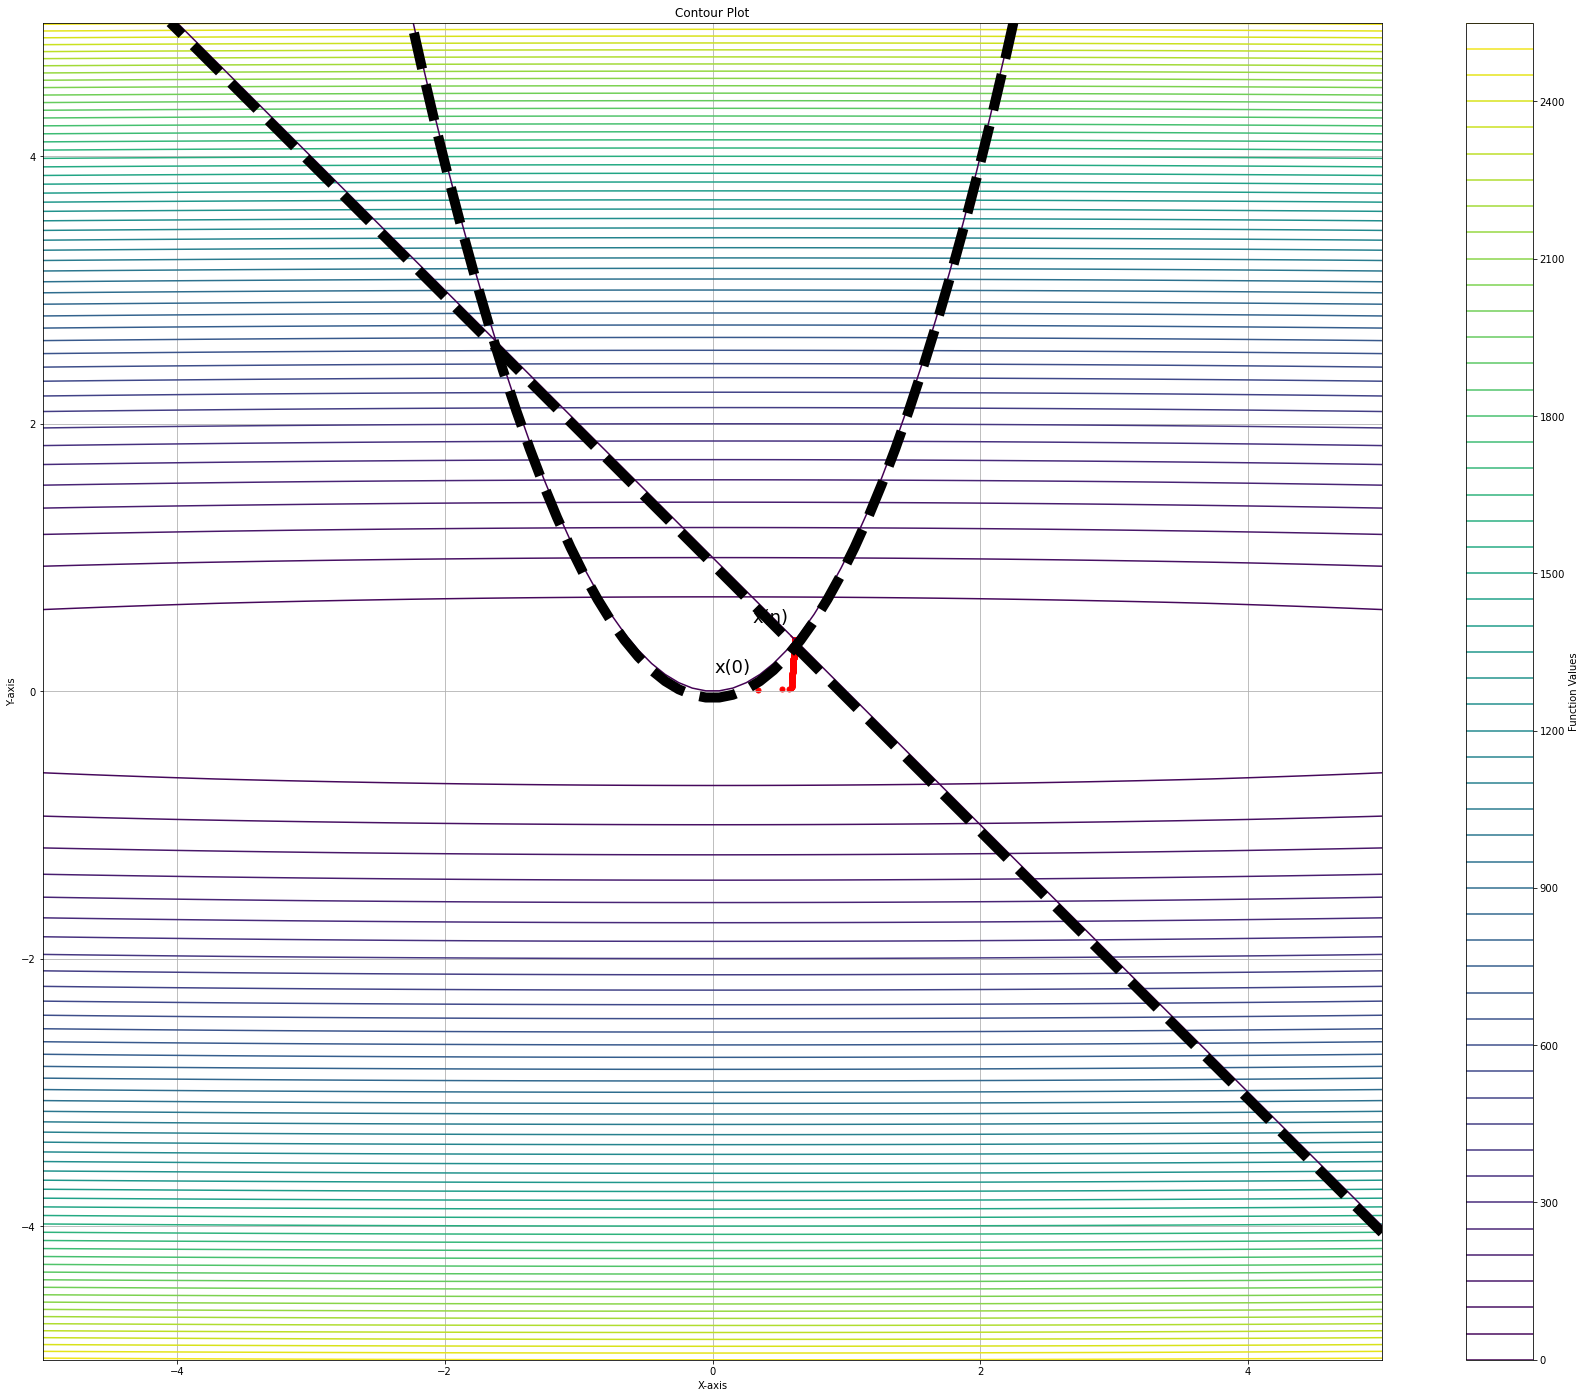

In [22]:
third_solver = UzawaSolver(function_2, [constraint_21, constraint_22])
third_solver.solve_min(
    x0_internal=np.array([4, 4]), _lambda=np.array([1, 1]), tau=1, max_iter=1000, 
    alpha=0.005, use_epsilon_internal=True, max_iter_internal=1000,
    use_epsilon=True, epsilon=0.001
)
plotter3 = UzawaPlotter(third_solver)
plotter3.summary()

--------------------------------------------------------------------------------------

            
            Calculated Optiaml x: [0.61803513 0.38197485]
            iteration to convergence: 30


--------------------------------------------------------------------------------------


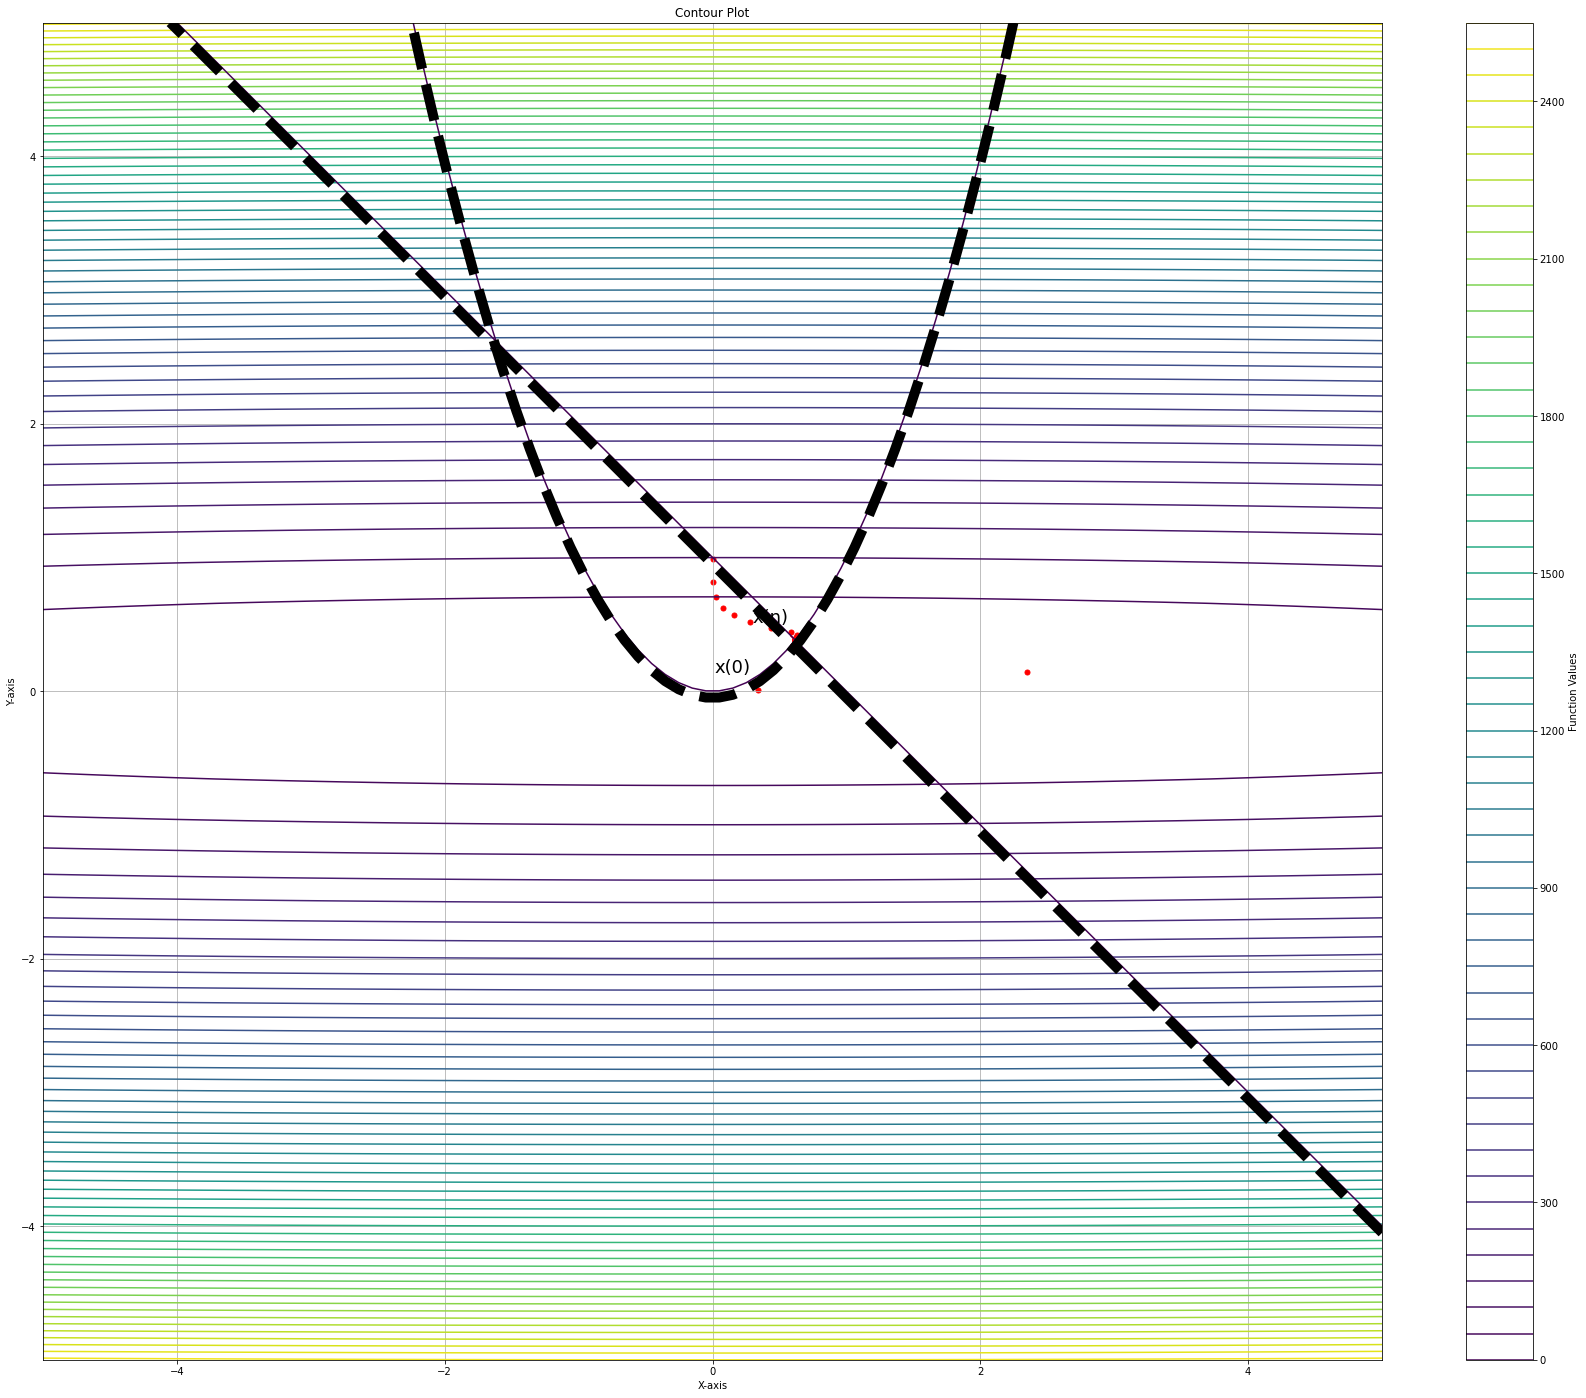

In [36]:
forth_solver = UzawaSolver(function_2, [constraint_21, constraint_22])
forth_solver.solve_min(
    x0_internal=np.array([4, 4]), _lambda=np.array([1, 1]), tau=36, max_iter=500, 
    alpha=0.005, use_epsilon_internal=True, max_iter_internal=1000,
    use_epsilon=True, epsilon=0.001
    
)
plotter4 = UzawaPlotter(forth_solver)
plotter4.summary()

## Manipulation des hyper-parametres et resultats obtenus:
| Alpha | X Initial | Lambda Initial | Critère d'Arrêt | Max d'itérations | Nombre d'Iterations | X Optimal | Erreur    |
|-------|-----------|-----------------|-----------------|----------------------|-----------|-----------|-----------|
| 0,1   | 2,0       | 0,02            | 0,001           | 50                   | 203                  | (0.6123393, 0.33203833) | 0,2       |
| 0,01  | -1,5      | 0,015           | 0,005           | 30                   | 15                   | -1,6      | 0,1       |
| 0,5   | 3,2       | 0,05            | 0,002           | 40                   | 20                   | 3,0       | 0,2       |
| 0,05  | 0,8       | 0,008           | 0,003           | 20                   | 12                   | 0,9       | 0,1       |


Consider ading some points here: 
- 
- 

In [11]:
malcond_function = Function( 
    lambda x: 0.5 * x[0] ** 2 + 100 * x[1] ** 2,
    lambda x: np.array([x[0], 200 * x[1]]),
    lambda x: np.array([[1, 0], [0, 200]])
)

In [12]:
malcond_solver = UzawaSolver(malcond_function, [constraint_1])
malcond_solver.solve_min(x0_internal, _lambda: np.array, tau=0.01, alpha=0.01, max_iter_internal=50,
                  max_iter=50, use_epsilon=False, epsilon=0.01, decay_type=None, decay_param=None,
                   use_epsilon_internal=False, epsilon_internal=0.01, decay_type_internal=None, decay_param_internal=None):
        

SyntaxError: invalid syntax (<ipython-input-12-1d215b9e0ba5>, line 2)

In [ ]:
# plot the gradients, plot the lambdas
